# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
# %pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
import matplotlib.dates as mdates

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [8]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [9]:
df_data.isna().values.any()

True

In [10]:
df_data.isna().any()

Unnamed: 0.1      False
Unnamed: 0        False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

In [11]:
df_data.duplicated().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [12]:
clean_df = df_data.fillna(0)
clean_df["Date"] = pd.to_datetime(df_data["Date"], utc=True)
clean_df.drop("Unnamed: 0.1", inplace=True, axis=1)
clean_df.drop("Unnamed: 0", inplace=True, axis=1)
clean_df.tail()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,0,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,0,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,0,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,0,Success
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,0,Success


## Descriptive Statistics

In [13]:
clean_df.describe()

C:\Users\USER\AppData\Local\Temp\ipykernel_8876\1399198032.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_df.describe()


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,"4,324.00",4324
unique,56,137,4319,4278,2,57.00,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2008-11-05 00:15:00+00:00,Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,0.00,Success
freq,1777,235,2,6,3534,"3,360.00",3879
first,NaN,NaN,1957-10-04 19:28:00+00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-08-07 05:12:00+00:00,NaN,NaN,NaN,NaN


In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           4324 non-null   object             
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 236.6+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [15]:
rockets_per_org = clean_df["Organisation"].value_counts()
rockets_per_org

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


In [16]:
bar = px.bar(x=rockets_per_org.index, 
             y=rockets_per_org.values, 
             title="Space Mission Launches per Organisation", 
             color=rockets_per_org.values)
bar.update_layout(xaxis_title="Organisation", 
                  yaxis_title="Number of Space Mission Launches", 
                  coloraxis_showscale=False)
bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [17]:
clean_df["Rocket_Status"].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [18]:
clean_df["Mission_Status"].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [19]:
clean_df[clean_df["Mission_Status"]=="Prelaunch Failure"]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
106,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...",2019-08-29 00:00:00+00:00,Safir-1B+ | Nahid-1,StatusActive,0,Prelaunch Failure
413,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2016-09-01 13:07:00+00:00,Falcon 9 Block 3 | AMOS-6,StatusRetired,62.0,Prelaunch Failure
1032,AEB,"VLS Pad, Alc?›ntara Launch Center, Maranh?œo, ...",2003-08-25 00:00:00+00:00,"VLS-1 | SATEC, UNOSAT",StatusActive,0,Prelaunch Failure
3816,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1966-12-14 11:27:00+00:00,Soyuz | Soyuz 7K-OK n†­1,StatusRetired,0,Prelaunch Failure


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [20]:
histogram = px.histogram(clean_df,
                         x="Price",
                         color="Price",
                         opacity=1)
histogram.update_layout(xaxis_title="Cost of Rockets",
                        yaxis_title="Number of Rockets")
histogram.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly"s available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [21]:
clean_df["ISO"] = clean_df["Location"].str.split(',').str[-1]
clean_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [22]:
def get_valid_ISO(country):
    try:
        country = country.strip()
        if country == "Russia" or country == "Barents Sea":
            country = "Russian Federation"
        elif country == "New Mexico" or country == "Pacific Missile Range Facility" or country == "Gran Canaria":
            country = "USA"
        elif country == "Yellow Sea":
            country = "China"
        elif country == "Shahrud Missile Test Site":
            country = "Iran"
        result = countries.get(country)
    except Exception:
        return np.nan
    else:
        return result[2]

In [23]:
clean_df["ISO"] = clean_df["ISO"].apply(lambda country: get_valid_ISO(country))
clean_df["ISO"].value_counts()

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
NZL      13
ISR      11
KEN       9
AUS       6
BRA       3
Name: ISO, dtype: int64

In [24]:
fig = px.choropleth(locations=clean_df["ISO"].value_counts().index,
                    color=clean_df["ISO"].value_counts().values,
                    color_continuous_scale=px.colors.sequential.matter,
                    hover_name=clean_df["ISO"].value_counts().index,
                    title="Number of Launches by Country")
fig.update_layout(coloraxis_showscale=False)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [25]:
failure_by_country_df = clean_df.loc[clean_df["Mission_Status"] != "Success"]
failure_by_country_df = failure_by_country_df.groupby(["ISO"], as_index=False).agg({"Mission_Status": pd.Series.count})
failure_by_country_df

,ISO,Mission_Status
0,AUS,3
1,BRA,3
2,CHN,25
3,FRA,18
4,IND,13
5,ISR,2
6,JPN,13
7,KAZ,93
8,NZL,2
9,RUS,93


In [26]:
fig = px.choropleth(failure_by_country_df, locations="ISO",
                    color="Mission_Status", color_continuous_scale=px.colors.sequential.matter,
                    hover_name="ISO", title="Number of Failures by Country")
fig.update_layout(coloraxis_showscale=False)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [27]:
sunburst_df = clean_df.groupby(["ISO", "Organisation", "Mission_Status"])["Mission_Status"].count().reset_index(name="count")
sun = px.sunburst(sunburst_df, path=["ISO", "Organisation", "Mission_Status"],
                  values="count", title="Relationship between Countries, Organisations, and Mission Status")

sun.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [28]:
clean_df["Price"] = pd.to_numeric(clean_df["Price"].str.replace(",", ""))

In [29]:
clean_df.groupby(["Organisation"])["Price"].sum().reset_index(name="Total_Spent").sort_values("Total_Spent", ascending=False)

,Organisation,Total_Spent
35,NASA,"76,280.00"
3,Arianespace,"16,345.00"
48,ULA,"14,798.00"
40,RVSN USSR,"10,000.00"
7,CASC,"6,340.26"
46,SpaceX,"5,444.00"
36,Northrop,"3,930.00"
32,MHI,"3,532.50"
23,ISRO,"2,177.00"
49,US Air Force,"1,550.92"


# Analyse the Amount of Money Spent by Organisation per Launch

In [30]:
clean_df.groupby(["Organisation"])["Price"].mean().reset_index(name="Avg_Spent_Per_Launch").sort_values("Avg_Spent_Per_Launch", ascending=False)

,Organisation,Avg_Spent_Per_Launch
40,RVSN USSR,"5,000.00"
35,NASA,511.95
6,Boeing,177.29
3,Arianespace,170.26
48,ULA,151.00
19,ILS,101.54
32,MHI,95.47
34,Martin Marietta,80.16
49,US Air Force,59.65
24,JAXA,56.00


# Chart the Number of Launches per Year

In [31]:
launch_per_year = clean_df.groupby(pd.DatetimeIndex(clean_df["Date"]).year).size().reset_index(name="Number Of Launches")
launch_per_year

,Date,Number Of Launches
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


In [32]:
launch_per_year_bar = px.bar(launch_per_year, x="Date", y="Number Of Launches", color="Number Of Launches", 
                             color_continuous_scale=px.colors.sequential.Agsunset, title="Number of Launches per Year")
launch_per_year_bar.update_layout(xaxis_title="Year", yaxis_title="Number of Launches", coloraxis_showscale=False)
launch_per_year_bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [33]:
month_roll_df = clean_df.set_index(pd.DatetimeIndex(clean_df['Date']).date)
month_roll_df["Number Of Launches"] = month_roll_df["Price"]
month_roll_df = month_roll_df.drop(columns="Price").rolling(window=6).mean()
month_roll_df = month_roll_df.groupby(month_roll_df.index).count()
month_roll_df

C:\Users\USER\AppData\Local\Temp\ipykernel_8876\59838008.py:3: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date', 'Detail', 'ISO', 'Location', 'Mission_Status', 'Organisation',
       'Rocket_Status'],
      dtype='object')



,Number Of Launches
1957-10-04,0
1957-11-03,0
1957-12-06,0
1958-02-01,0
1958-02-05,0
...,...
2020-07-25,0
2020-07-30,0
2020-08-04,0
2020-08-06,0


In [34]:
# Formatting the ticks
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

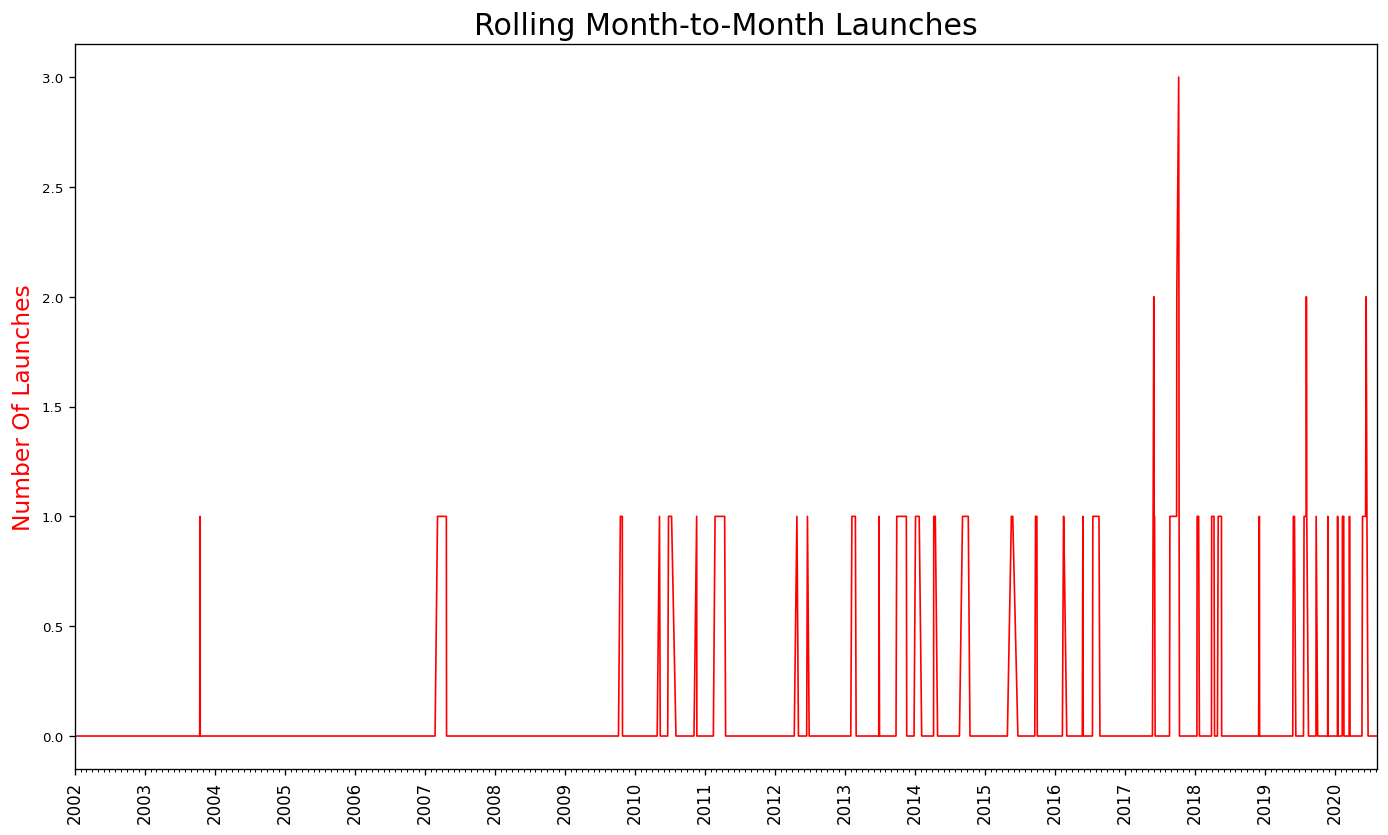

In [35]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Rolling Month-to-Month Launches", fontsize=18)
plt.yticks(fontsize=8)
plt.xticks(fontsize=10, rotation=90)

ax1 = plt.gca()
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
ax1.set_ylabel('Number Of Launches', color="red", fontsize=14)
ax1.set_xlim([pd.to_datetime("2002", utc=True), month_roll_df.index.max()])

plt.plot(month_roll_df.index, month_roll_df["Number Of Launches"], linewidth=1, color="red")

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [36]:
launch_per_month = clean_df.groupby(pd.DatetimeIndex(clean_df["Date"]).month).size().reset_index(name="Number Of Launches")
launch_per_month

,Date,Number Of Launches
0,1,268
1,2,336
2,3,353
3,4,383
4,5,326
5,6,402
6,7,351
7,8,373
8,9,365
9,10,381


In [37]:
launch_per_month.max()

Date                   12
Number Of Launches    450
dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [38]:
avg_price_per_year = clean_df.groupby(pd.DatetimeIndex(clean_df["Date"]).year)["Price"].mean().reset_index(name='Average_Price').fillna(0)
avg_price_per_year

,Date,Average_Price
0,1957,0.00
1,1958,0.00
2,1959,0.00
3,1960,0.00
4,1961,0.00
...,...,...
59,2016,79.46
60,2017,69.49
61,2018,64.75
62,2019,59.61


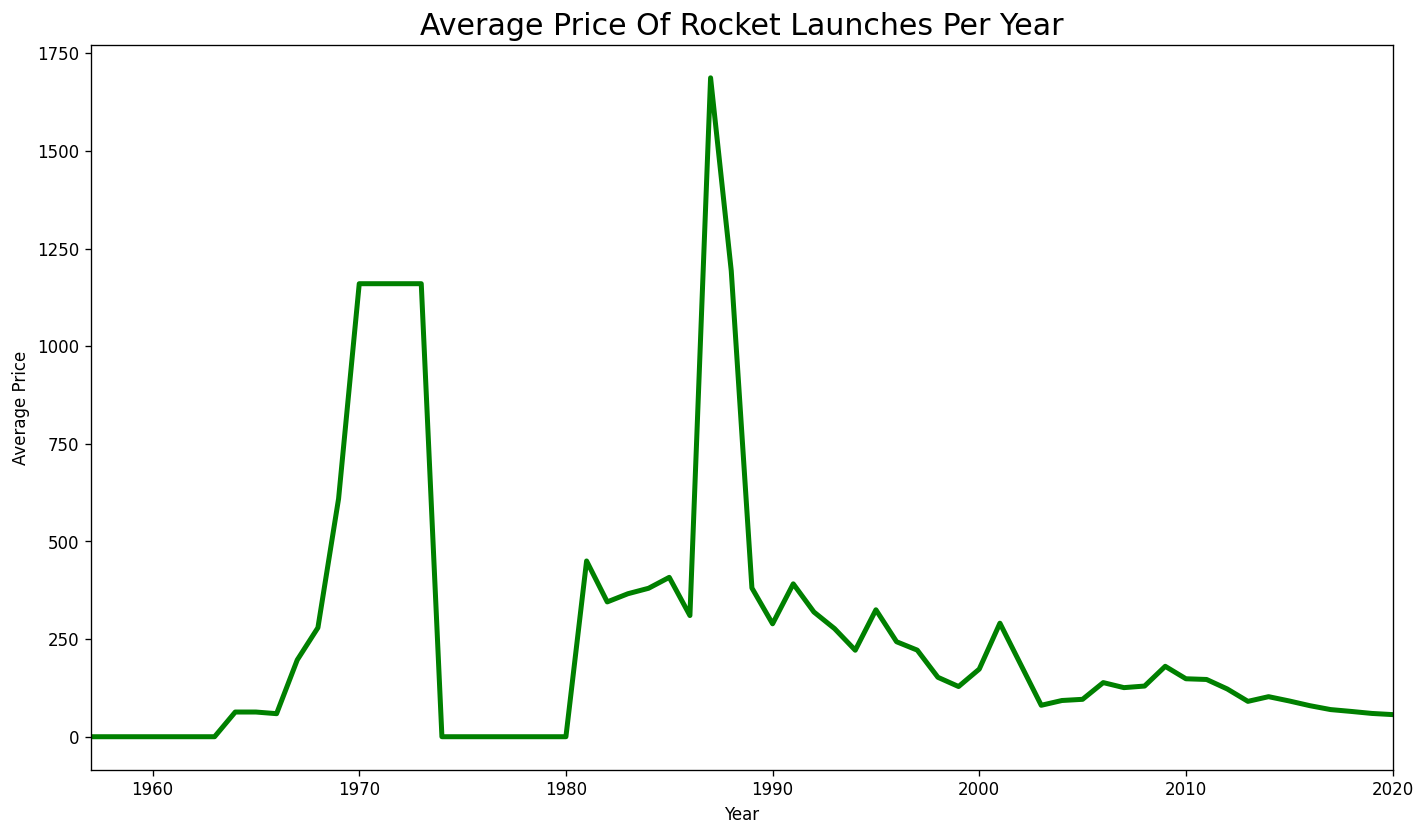

In [39]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Average Price Of Rocket Launches Per Year", fontsize=18)
plt.xlim([avg_price_per_year["Date"].min(), avg_price_per_year["Date"].max()])
plt.xlabel("Year")
plt.ylabel("Average Price")

plt.plot(avg_price_per_year["Date"], avg_price_per_year["Average_Price"], linewidth=3, color="green")
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [40]:
top_10_orgs = clean_df.groupby(["Organisation", pd.DatetimeIndex(clean_df["Date"]).year]).size().reset_index(name="Number Of Launches")
temp = clean_df.groupby("Organisation").size().reset_index(name="Number Of Launches").sort_values("Number Of Launches", ascending=False)[:10]
top_10_orgs_list = []
for index, row in temp.iterrows():
    top_10_orgs_list.append(row["Organisation"])
top_10_orgs = top_10_orgs[top_10_orgs["Organisation"].isin(top_10_orgs_list)]
top_10_orgs

,Organisation,Date,Number Of Launches
12,Arianespace,1984,3
13,Arianespace,1985,4
14,Arianespace,1986,3
15,Arianespace,1987,2
16,Arianespace,1988,6
...,...,...,...
654,VKS RF,2016,4
655,VKS RF,2017,6
656,VKS RF,2018,5
657,VKS RF,2019,8


In [41]:
top_10_orgs_line_graph = px.line(top_10_orgs, x="Date", y="Number Of Launches", color="Organisation", 
                                 title="Number of Launches over Time by the Top 10 Organisations")
top_10_orgs_line_graph.update_layout(xaxis_title="Year", yaxis_title="Number of Launches")
top_10_orgs_line_graph.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [42]:
clean_df["ISO"].value_counts()

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
NZL      13
ISR      11
KEN       9
AUS       6
BRA       3
Name: ISO, dtype: int64

In [43]:
cold_war_df = clean_df[clean_df["ISO"].isin(["RUS", "USA", "KAZ"])]
cold_war_df["Country"] = cold_war_df["ISO"].apply(lambda country: "USSR" if country in ["RUS", "KAZ"] else country)
cold_war_df[cold_war_df["Country"] == "USSR"]
cold_war_df = cold_war_df[cold_war_df["Date"] <= pd.to_datetime("1991", utc=True)]
cold_war_df = cold_war_df.groupby(["Country",  pd.DatetimeIndex(cold_war_df["Date"]).year]).size().reset_index(name="Number Of Launches")
cold_war_df

C:\Users\USER\AppData\Local\Temp\ipykernel_8876\2199409972.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Date,Number Of Launches
0,USA,1957,1
1,USA,1958,23
2,USA,1959,16
3,USA,1960,30
4,USA,1961,43
...,...,...,...
63,USSR,1986,49
64,USSR,1987,42
65,USSR,1988,36
66,USSR,1989,26


In [44]:
cold_war_line_graph = px.line(cold_war_df, x="Date", y="Number Of Launches",
                color="Country", title="Cold War Space Race: USA vs USSR")
cold_war_line_graph.update_layout(xaxis_title="Year", yaxis_title="Number of Launches")
cold_war_line_graph.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [45]:
cold_war_pie_df = cold_war_df.groupby(["Country"])["Number Of Launches"].sum().reset_index(name="Total Number Of Launches")
cold_war_pie_df

,Country,Total Number Of Launches
0,USA,644
1,USSR,1741


In [46]:
cold_war_pie_chart = px.pie(title='Total Number of Launches of the USSR and the USA', names=cold_war_pie_df["Country"],
                            labels=cold_war_pie_df["Country"], values=cold_war_pie_df["Total Number Of Launches"])
cold_war_pie_chart.update_traces(textinfo='percent+label')
cold_war_pie_chart.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [47]:
cold_war_year_on_year_bar = px.bar(cold_war_df, x="Date", y="Number Of Launches", color="Country",
                                    title="Total Number of Launches Year-On-Year by the Two Superpowers")
cold_war_year_on_year_bar.update_layout(xaxis_title="Year", yaxis_title="Number of Launches")
cold_war_year_on_year_bar.show()

## Chart the Total Number of Mission Failures Year on Year.

In [48]:
failures_per_year = clean_df.copy()
failures_per_year["Date"] = pd.DatetimeIndex(failures_per_year["Date"]).year
failures_per_year = failures_per_year[failures_per_year["Mission_Status"] != "Success"]
failures_per_year = failures_per_year.groupby(["Date"]).size().reset_index(name="Number Of Failures")
failures_per_year

,Date,Number Of Failures
0,1957,1
1,1958,22
2,1959,12
3,1960,20
4,1961,20
...,...,...
59,2016,4
60,2017,8
61,2018,4
62,2019,9


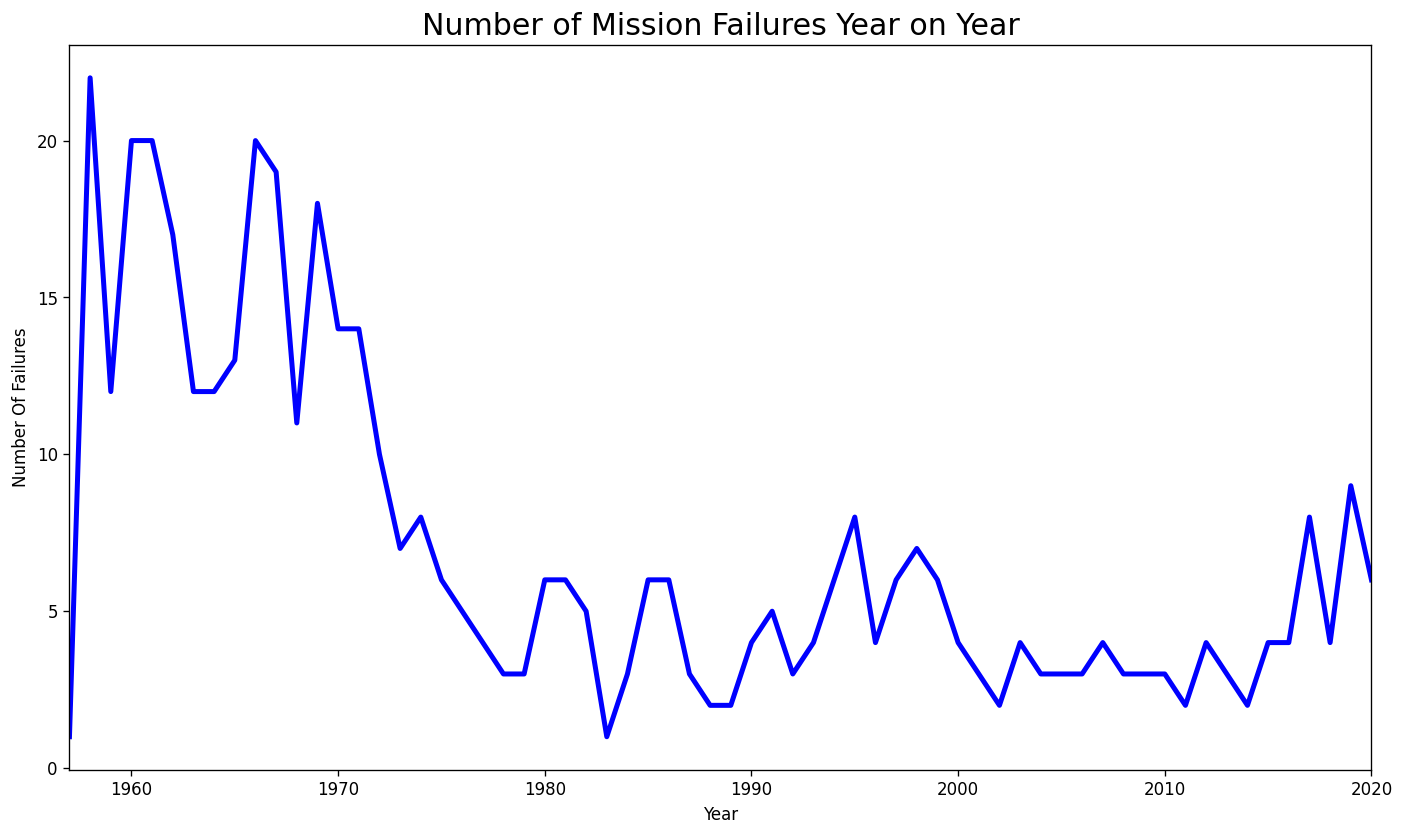

In [49]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Number of Mission Failures Year on Year", fontsize=18)
plt.xlim([failures_per_year["Date"].min(), failures_per_year["Date"].max()])
plt.xlabel("Year")
plt.ylabel("Number Of Failures")

plt.plot(failures_per_year["Date"], failures_per_year["Number Of Failures"], linewidth=3, color="blue")
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [50]:
successes_per_year = clean_df.copy()
successes_per_year["Date"] = pd.DatetimeIndex(successes_per_year["Date"]).year
successes_per_year = successes_per_year[successes_per_year["Mission_Status"] == "Success"]
successes_per_year = successes_per_year.groupby(["Date"]).size().reset_index(name="Number Of Successes")
successes_per_year

,Date,Number Of Successes
0,1957,2
1,1958,6
2,1959,8
3,1960,19
4,1961,32
...,...,...
59,2016,86
60,2017,84
61,2018,113
62,2019,100


In [51]:
successes_and_failures_per_year = pd.merge(failures_per_year, successes_per_year, on="Date")

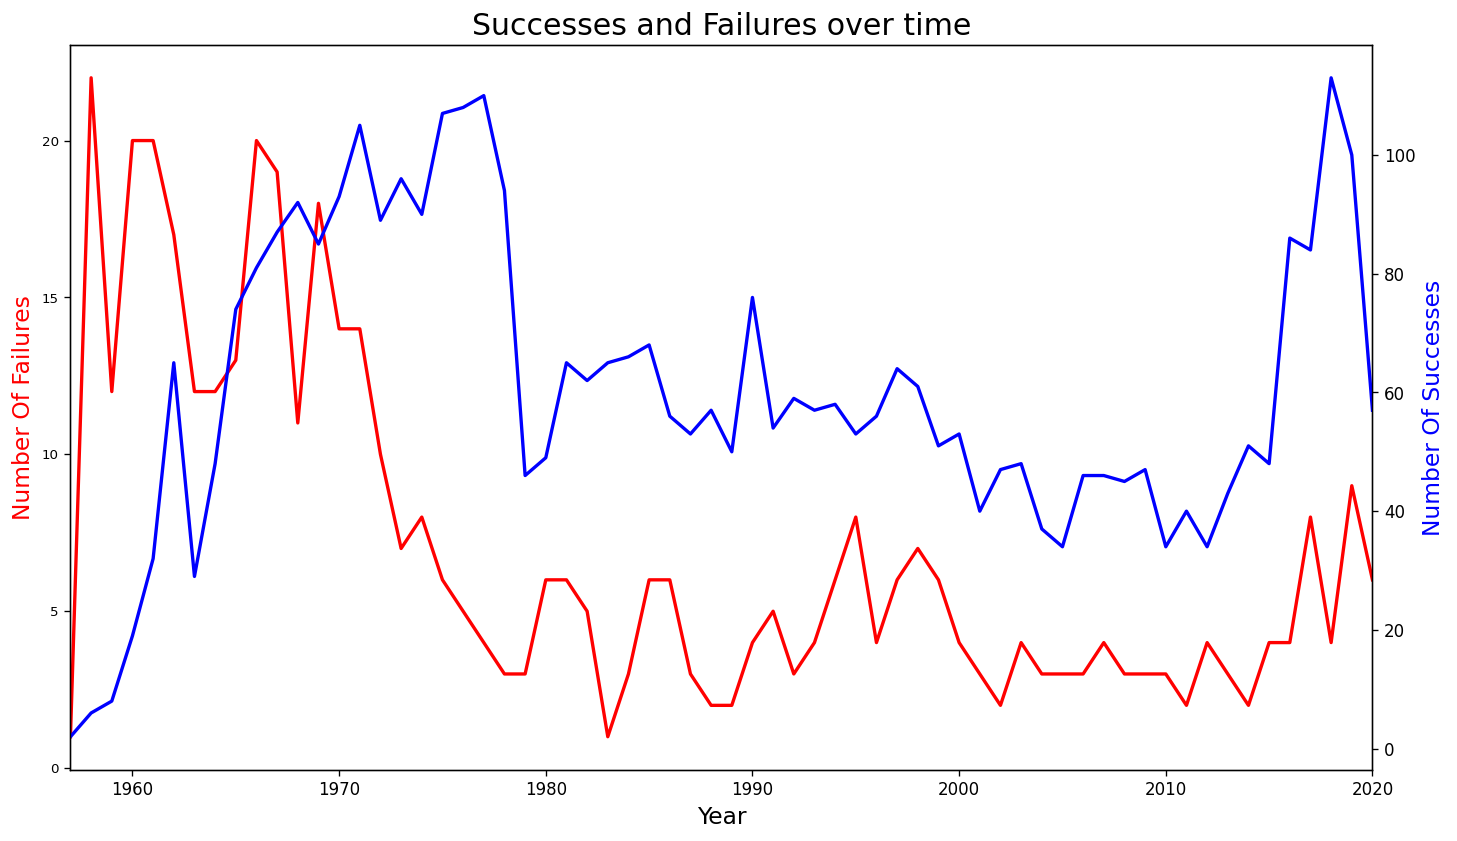

In [52]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Successes and Failures over time", fontsize=18)
plt.yticks(fontsize=8)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim([successes_and_failures_per_year["Date"].min(), successes_and_failures_per_year["Date"].max()])
ax1.set_xlabel("Year", fontsize=14)

ax1.set_ylabel("Number Of Failures", color="red", fontsize=14)
ax2.set_ylabel("Number Of Successes", color="blue", fontsize=14)

ax1.plot(successes_and_failures_per_year["Date"], successes_and_failures_per_year["Number Of Failures"], linewidth=2, color="red")
ax2.plot(successes_and_failures_per_year["Date"], successes_and_failures_per_year["Number Of Successes"], linewidth=2, color="blue")

plt.show()

In [53]:
fail_count = successes_and_failures_per_year["Number Of Failures"]
success_count = successes_and_failures_per_year["Number Of Successes"]
successes_and_failures_per_year["Percentage Failure"] = round(fail_count/(success_count+fail_count) * 100, 2)
successes_and_failures_per_year

,Date,Number Of Failures,Number Of Successes,Percentage Failure
0,1957,1,2,33.33
1,1958,22,6,78.57
2,1959,12,8,60.00
3,1960,20,19,51.28
4,1961,20,32,38.46
...,...,...,...,...
59,2016,4,86,4.44
60,2017,8,84,8.70
61,2018,4,113,3.42
62,2019,9,100,8.26


In [54]:
bar = px.bar(successes_and_failures_per_year, x="Date", y="Percentage Failure",
             color="Percentage Failure", color_continuous_scale=px.colors.sequential.Aggrnyl,
             title="Percentage of Failures over Time")
bar.update_layout(xaxis_title="Year", yaxis_title="Percentage of Failures", coloraxis_showscale=False)
bar.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [55]:
country_with_most_launches_per_year = clean_df.groupby([pd.DatetimeIndex(clean_df["Date"]).year, 'ISO']).size().reset_index(name="Number Of Launches")
country_with_most_launches_per_year = country_with_most_launches_per_year.sort_values(["Date", "Number Of Launches"], ascending=False).drop_duplicates(subset="Date", keep="first")
country_with_most_launches_per_year

,Date,ISO,Number Of Launches
389,2020,CHN,22
381,2019,CHN,34
373,2018,CHN,39
372,2017,USA,30
364,2016,USA,27
...,...,...,...
10,1961,USA,43
7,1960,USA,30
5,1959,USA,16
3,1958,USA,23


In [56]:
country_with_most_success_per_year = clean_df.copy()
country_with_most_success_per_year["Date"] = pd.DatetimeIndex(country_with_most_success_per_year["Date"]).year
country_with_most_success_per_year = country_with_most_success_per_year[country_with_most_success_per_year["Mission_Status"] == "Success"]
country_with_most_success_per_year = country_with_most_success_per_year.groupby(["Date", "ISO"]).size().reset_index(name="Number Of Successful Launches")
country_with_most_success_per_year = country_with_most_success_per_year.sort_values(["Date", "Number Of Successful Launches"], ascending=False).drop_duplicates(subset="Date", keep="first")
country_with_most_success_per_year 

,Date,ISO,Number Of Successful Launches
364,2020,USA,20
349,2019,CHN,32
341,2018,CHN,38
340,2017,USA,30
333,2016,USA,26
...,...,...,...
8,1961,USA,27
6,1960,USA,16
4,1959,USA,6
2,1958,USA,5


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [57]:
lead_org_per_year = clean_df.groupby([pd.DatetimeIndex(clean_df["Date"]).year, "Organisation"]).size().reset_index(name="Number Of Launches")
lead_org_per_year

,Date,Organisation,Number Of Launches
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
658,2020,Roscosmos,4
659,2020,SpaceX,14
660,2020,ULA,4
661,2020,VKS RF,3


In [58]:
lead_org_per_year_bar = px.bar(lead_org_per_year, x="Date", y="Number Of Launches", color="Organisation", 
                               title="Year-on-Year Launches per Organisations")
lead_org_per_year_bar.update_layout(xaxis_title="Year", yaxis_title="Number of Launches")
lead_org_per_year_bar.show()